In [18]:
import numpy as np
import pandas as pd
import datetime
from src.clean_dates_funcs import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
forex_pairs = pd.read_csv('./Output/forex_pairs.csv')
forex_pairs_sample = get_sample(forex_pairs)
forex_pairs = red_and_ind(forex_pairs)

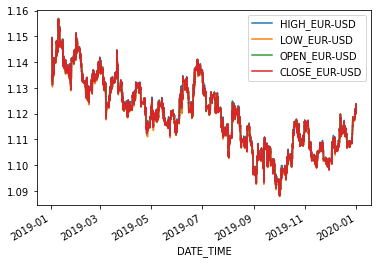

In [13]:
forex_pairs[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

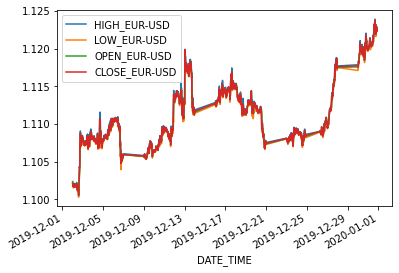

In [12]:
forex_pairs_sample[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

<ipython-input-4-491a0bb02d77>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  first_plt = sm.tsa.seasonal_decompose(forex_pairs_sample["CLOSE_EUR-USD"], freq= 480)


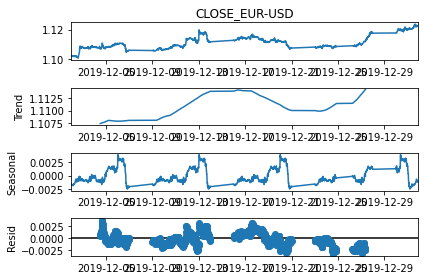

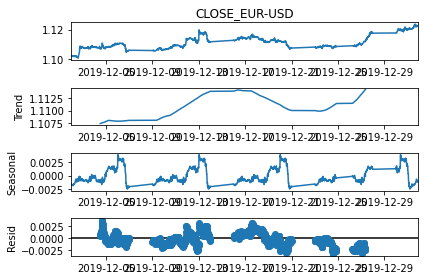

In [4]:
first_plt = sm.tsa.seasonal_decompose(forex_pairs_sample["CLOSE_EUR-USD"], freq= 480)
first_plt.plot()

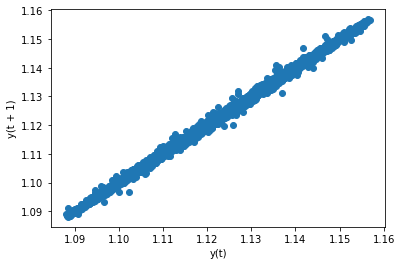

In [15]:
pd.plotting.lag_plot(forex_pairs['CLOSE_EUR-USD'])

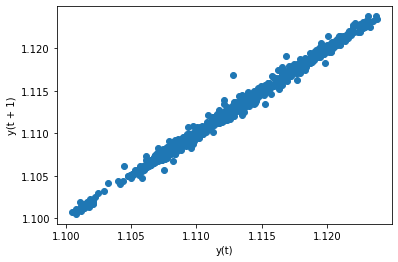

In [6]:
pd.plotting.lag_plot(forex_pairs_sample['CLOSE_EUR-USD'])

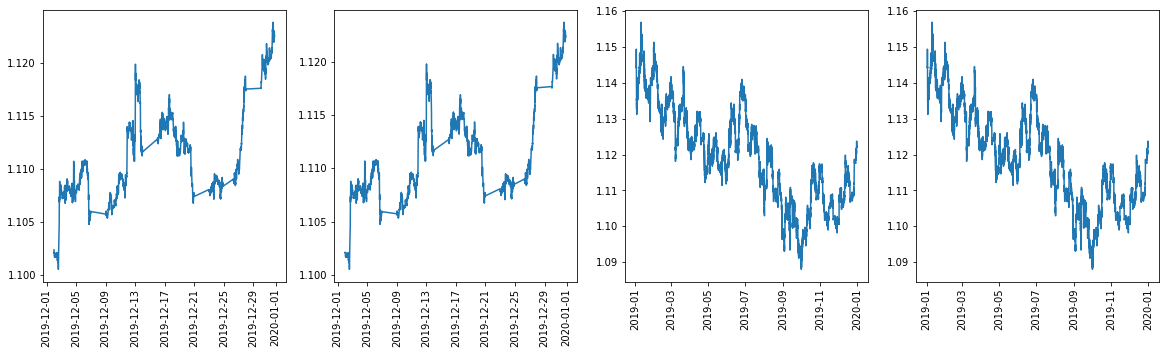

In [17]:


plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(forex_pairs_sample[["OPEN_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,4,2)
plt.plot(forex_pairs_sample[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,4,3)
plt.plot(forex_pairs[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.plot(forex_pairs[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)

#plt.xticks(range(0,168,7),list(m),rotation=90)
plt.show()

In [8]:
#Case all 2019
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

[(col,stationaryCheck(forex_pairs[col])) for col in forex_pairs_sample.columns]

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('HIGH_USD-CAD', 'Stationary'),
 ('LOW_USD-CAD', 'Stationary'),
 ('OPEN_USD-CAD', 'Stationary'),
 ('CLOSE_USD-CAD', 'Stationary'),
 ('HIGH_USD-CAD.1', 'Not-Stationary'),
 ('LOW_USD-CAD.1', 'Not-Stationary'),
 ('OPEN_USD-CAD.1', 'Not-Stationary'),
 ('CLOSE_USD-CAD.1', 'Not-Stationary'),
 ('HIGH_AUD-USD', 'Not-Stationary'),
 ('LOW_AUD-USD', 'Not-Stationary'),
 ('OPEN_AUD-USD', 'Not-Stationary'),
 ('CLOSE_A

In [9]:
#Case December
[(col,stationaryCheck(forex_pairs_sample[col])) for col in forex_pairs_sample.columns]

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('HIGH_USD-CAD', 'Not-Stationary'),
 ('LOW_USD-CAD', 'Not-Stationary'),
 ('OPEN_USD-CAD', 'Not-Stationary'),
 ('CLOSE_USD-CAD', 'Not-Stationary'),
 ('HIGH_USD-CAD.1', 'Not-Stationary'),
 ('LOW_USD-CAD.1', 'Not-Stationary'),
 ('OPEN_USD-CAD.1', 'Not-Stationary'),
 ('CLOSE_USD-CAD.1', 'Not-Stationary'),
 ('HIGH_AUD-USD', 'Not-Stationary'),
 ('LOW_AUD-USD', 'Not-Stationary'),
 ('OPEN_AUD-USD', 'Not-Stationa

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

In [19]:
scal = MinMaxScaler()
scaled = pd.DataFrame(scal.fit_transform(forex_pairs_sample), columns=forex_pairs_sample.columns)

In [20]:
scaled

,HIGH_EUR-USD,LOW_EUR-USD,OPEN_EUR-USD,CLOSE_EUR-USD,HIGH_EUR-JPY,LOW_EUR-JPY,OPEN_EUR-JPY,CLOSE_EUR-JPY,HIGH_USD-JPY,LOW_USD-JPY,...,OPEN_USD-CAD,CLOSE_USD-CAD,HIGH_USD-CAD.1,LOW_USD-CAD.1,OPEN_USD-CAD.1,CLOSE_USD-CAD.1,HIGH_AUD-USD,LOW_AUD-USD,OPEN_AUD-USD,CLOSE_AUD-USD
0,0.067100,0.077022,0.078970,0.067899,0.269509,0.269525,0.269466,0.264784,0.848846,0.847179,...,0.869553,0.875896,0.976848,0.978381,0.977469,0.979694,0.009756,0.006372,0.019695,0.005944
1,0.057576,0.070998,0.063519,0.066180,0.265322,0.254211,0.264122,0.249905,0.850438,0.842476,...,0.875896,0.880033,0.977964,0.979490,0.980529,0.977747,0.001876,0.008996,0.005574,0.011144
2,0.056277,0.075731,0.066094,0.068328,0.249715,0.251914,0.249618,0.251431,0.819411,0.829937,...,0.878103,0.879482,0.977964,0.977827,0.978025,0.978860,0.004128,0.010870,0.010777,0.010030
3,0.056710,0.077022,0.068240,0.067039,0.258089,0.259571,0.251145,0.258680,0.847255,0.837774,...,0.878930,0.895753,0.976569,0.975610,0.978860,0.974409,0.007505,0.008996,0.009662,0.008172
4,0.057143,0.066265,0.067811,0.056725,0.258089,0.252680,0.259160,0.259443,0.848846,0.840909,...,0.895753,0.902372,0.982148,0.975887,0.974409,0.984701,0.008630,0.009370,0.007804,0.016345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.957576,0.948365,0.945494,0.961753,0.739627,0.745789,0.736641,0.741320,0.124901,0.119122,...,0.051296,0.059018,0.061925,0.048503,0.067316,0.044506,0.987992,0.982009,0.986622,0.971397
1964,0.955844,0.953959,0.959657,0.944134,0.740388,0.747703,0.741221,0.737123,0.120923,0.123824,...,0.059294,0.037231,0.050488,0.048503,0.043394,0.050626,0.974109,0.979385,0.971386,0.968425
1965,0.939394,0.950086,0.942918,0.941985,0.740769,0.743492,0.737786,0.740939,0.131265,0.144201,...,0.037231,0.032267,0.059414,0.055710,0.050626,0.062031,0.967730,0.969265,0.968042,0.964339
1966,0.939827,0.944923,0.941202,0.945423,0.742292,0.747703,0.740840,0.746662,0.135243,0.152821,...,0.032267,0.042195,0.061925,0.066796,0.061752,0.062309,0.963977,0.961769,0.964326,0.957281


### LSTM Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense, Flatten